# 1.2.4: Bikeshare (Stepping Forward in Time)

<br>



---



*Modeling and Simulation in Python*


Copyright 2021 Allen Downey, (License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/))

Revised, Mike Augspurger (2021-present)

<br>

---





### Importing Libraries and Functions

We've imported libaries like Pandas and Numpy before.  From now on, we'll just put these import lines at the beginning of the notebook.

<br>

In addition, we'll often want to import functions from previous notebooks.  This is a little more cumbersome, but don't worry about understanding the code for this.   

<br>

But be sure to run this cell before you work on the notebook.  If you get an error that looks like `NameError: name 'bike_to_moline' is not defined`, there's a good chance you forgot to run this cell

In [ ]:
import pandas as pd
import numpy.random as npr

# Import files from Notebook 1.2.3
from urllib.request import urlretrieve
location = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/'
folder = 'Notebooks/1_2_Bikeshare_Stochastic/'
name = '1_2_3_bikeshare_if.ipynb'
local, _ = urlretrieve(location + folder + name, name)
%run /content/$name

## Moving through Time Steps

We have a way to keep track of the state of the system (*state variables*), and a rule for how things will change (*change function*).   Now we need to see what happens when time moves forward!

### Using `for loops` to simulate the passage of time

At some point you will get sick of running cells over and over.
Fortunately, there is an easy way to repeat a chunk of code, the *for loop*. Here's an example:

In [2]:
for i in range(3):
    print(i)
    bike_to_moline()

0


NameError: ignored

The syntax here should look familiar; the first line ends with a
colon, and the lines inside the `for` loop are indented. The other
elements of the loop are:

-   The words `for` and `in` are specialized words to be used in loops.

-   `range` is a Python function we use to control the number of times the loop runs.  Here it defines the number of times that the loop runs.

-   `i` is a *loop variable* that gets created when the for-loop runs. Notice that the first time, the value of `i` is `0`; the second time, it is `1`; the third time, it is `2`.  In this simple form, the loop variable always starts at `0`.

### Using a `Series` to record change

When we run a simulation, we often want to save the results for later analysis. We can save those results in a `Series`.  In this case, the labels are integers representing minutes; from now on, we'll call the collection of labels in a `Series` the `index`. In this case, the variables, or `values`, are the number of bikes at *one* location.

<br>

Since we have moved a number of bikes around, let's start again with a new state object.  When you run this cell, it overwrites any previously existing values for `bikeshare`.

In [1]:
bikeshare = pd.Series(dict(augie=10,moline=2),name="Number of Bikes")

NameError: ignored

We can create a new, empty `Series` to keep track of our results.:

In [ ]:
results = pd.Series([], dtype=object)
results.name='Number of Bikes at Augie'
results.index.name = 'Time (m)'

* The first line creates a `Series` with no values: the "[ ]" signifies there are no current values, but values might be added later. `dtype` tells it to expect any kind of object in the series.  

* The next two lines give a title to the index column ('Time (m)') and to the values column ('Number of Bikes at Augie'): these additions do not affect the actual labels or values in the `Series`.

Now we can add a quantity to our empty `Series` like this:

In [ ]:
results[0] = bikeshare.augie
results[0]

10

The number in brackets is the *label* for the first entry: that is, it is the initial state.  We can use a `Series` inside a `for` loop to store the results of the simulation:

In [ ]:
results[0] = bikeshare.augie
for i in range(3):
    print(i)
    change_func(0.6, 0.6)
    results[i+1] = bikeshare.augie

pd.DataFrame(results)

0
1
Moving a bike to Moline
2
Moving a bike to Moline


,Number of Bikes at Augie
Time (m),
0,10
1,10
2,9
3,8


Each time through the loop, we print the value of `i` and call `change_func`, which updates `bikeshare`.
Then we store the number of bikes at Augustana at that time step in `results`.
We use the loop variable, `i`, to compute the time stamp, `i+1`.

The first time through the loop, the value of `i` is `0`, so the time stamp is `1`.
The last time, the value of `i` is `2`, so the time stamp is `3`.

When the loop exits, `results` contains 4 time stamps, from 0 through
3, where time 0 is the initial state.  The `Series` stores the number of bikes at Augie at the end of each time step.  Check to see that the changes that are printed out match the changing number of bikes.

✅ ✅ Active Reading: Why do we save the result as in `results[i+1]` rather than `results[i]`?

✅ ✅ Answer here

### Using `plot` to display results

`Series` provides a function called `plot` we can use to plot
the results:

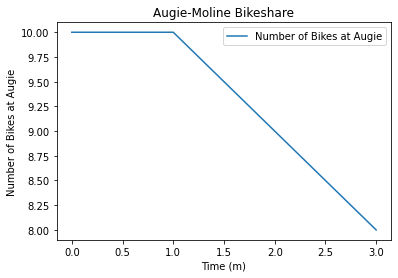

In [ ]:
results.plot(xlabel=results.index.name, ylabel=results.name,
            title='Augie-Moline Bikeshare',
            legend=True);

The result should be a plot with time on the $x$-axis and the number of bikes on the $y$-axis.
Since we only ran three time steps, it might not be very interesting.

<br>

Technical point: The function `plot`, in addition to making the plot, *returns* the axes of the plot.  The semicolon (;) tells Jupyter not to print this returned value.  Just for fun, remove the semicolon and run the cell again, and see what happens.

<br>



---



## Summary and Exercises

This chapter introduces the tools we need to run simulations, record the results, and plot them.

* We used the `flip` function and an `if` statement to simulate a `change function`.

* We used a `for` loop to simulate a series of steps, and another `Series` to record the results.

* Finally, we used `plot` to plot the results.  That's a lot of stuff!  

In the next chapter, we'll start to work on the simulation in order to make it a little more realistic.

<br>



---



### Exercise 1

✅ ✅  In the next chapter, we'll look for ways that we can improve this model.  In preparation, take a moment and try to list 3 aspects of a realistic bikeshare system that this model does not take into account.   Choose one of the aspects that you think might make the biggest difference, and suggest in a couple sentences how you might incorporate that aspect into the model (not in terms of code--just in terms of process).  

Put your answer in a text cell below this one.
